In [12]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [29]:
df_weather = pd.read_csv('data/sonoma/sonoma_weather_cleaned.csv')
df_wine = pd.read_csv('data/sonoma/sonoma_wine_cleaned.csv')

In [30]:
df_weather.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284002 entries, 0 to 284001
Data columns (total 6 columns):
 #   Column   Non-Null Count   Dtype  
---  ------   --------------   -----  
 0   STATION  284002 non-null  object 
 1   NAME     284002 non-null  object 
 2   DATE     284002 non-null  object 
 3   PRCP     257444 non-null  float64
 4   TMAX     124837 non-null  float64
 5   TMIN     124696 non-null  float64
dtypes: float64(3), object(3)
memory usage: 13.0+ MB


In [31]:
df_weather.head()

,STATION,NAME,DATE,PRCP,TMAX,TMIN
0,USC00048351,"SONOMA, CA US",1980-01-01,0.00,NaN,NaN
1,USC00048351,"SONOMA, CA US",1980-01-02,0.00,61.0,37.0
2,USC00048351,"SONOMA, CA US",1980-01-03,0.00,61.0,35.0
3,USC00048351,"SONOMA, CA US",1980-01-04,0.05,56.0,41.0
4,USC00048351,"SONOMA, CA US",1980-01-05,0.01,56.0,44.0


In [32]:
# Must convert DATE from object to Datetime to use rolling
df_weather['DATE'] = pd.to_datetime(df_weather['DATE'])

In [17]:
# Set DATE as index only for individual stations

# df_weather.set_index(['DATE'], inplace=True)
# PRCP is in inches, Temp is in F (example of data table: https://www.ncei.noaa.gov/cdo-web/quickdata)

In [33]:
df_weather.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284002 entries, 0 to 284001
Data columns (total 6 columns):
 #   Column   Non-Null Count   Dtype         
---  ------   --------------   -----         
 0   STATION  284002 non-null  object        
 1   NAME     284002 non-null  object        
 2   DATE     284002 non-null  datetime64[ns]
 3   PRCP     257444 non-null  float64       
 4   TMAX     124837 non-null  float64       
 5   TMIN     124696 non-null  float64       
dtypes: datetime64[ns](1), float64(3), object(2)
memory usage: 13.0+ MB


In [34]:
df_wine.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41 entries, 0 to 40
Data columns (total 11 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Year                 41 non-null     int64  
 1   CommodityCode        41 non-null     int64  
 2   CropName             41 non-null     object 
 3   CountyCode           41 non-null     int64  
 4   County               41 non-null     object 
 5   HarvestedAcres       41 non-null     float64
 6   Yield(Unit/Acre)     41 non-null     float64
 7   Production           41 non-null     float64
 8   Price(Dollars/Unit)  41 non-null     float64
 9   Unit                 41 non-null     object 
 10  Value(Dollars)       41 non-null     int64  
dtypes: float64(4), int64(4), object(3)
memory usage: 3.7+ KB


In [35]:
df_weather.head()

,STATION,NAME,DATE,PRCP,TMAX,TMIN
0,USC00048351,"SONOMA, CA US",1980-01-01,0.00,NaN,NaN
1,USC00048351,"SONOMA, CA US",1980-01-02,0.00,61.0,37.0
2,USC00048351,"SONOMA, CA US",1980-01-03,0.00,61.0,35.0
3,USC00048351,"SONOMA, CA US",1980-01-04,0.05,56.0,41.0
4,USC00048351,"SONOMA, CA US",1980-01-05,0.01,56.0,44.0


In [36]:
df_wine.head()

,Year,CommodityCode,CropName,CountyCode,County,HarvestedAcres,Yield(Unit/Acre),Production,Price(Dollars/Unit),Unit,Value(Dollars)
0,2020,216299,GRAPESWINE,97,Sonoma,56800.0,2.61,148000.0,2375.08,Tons,351512000
1,2019,216299,GRAPESWINE,97,Sonoma,57500.0,4.00,230000.0,2843.57,Tons,654021000
2,2018,216299,GRAPESWINE,97,Sonoma,59900.0,4.61,276000.0,2817.66,Tons,777675000
3,2017,216299,GRAPESWINE,97,Sonoma,60000.0,3.43,206000.0,2807.34,Tons,578313000
4,2016,216299,GRAPESWINE,97,Sonoma,60000.0,3.77,226000.0,2595.21,Tons,586518000


In [22]:
weather_stations = df_weather['STATION'].unique()
print(len(weather_stations), weather_stations[0])

122 USC00048351


In [54]:
date_count = df_weather.index.value_counts() == 1
date_count.sum()
# 2008 dates with only one station reading, which is very low considering there are over 160,000 samples

284002

In [55]:
# Test

df_USC00048351 = df_weather.loc[df_weather['STATION'] == 'USC00048351'].copy()

df_USC00048351.head()

,STATION,NAME,DATE,PRCP,TMAX,TMIN
0,USC00048351,"SONOMA, CA US",1980-01-01,0.00,NaN,NaN
1,USC00048351,"SONOMA, CA US",1980-01-02,0.00,61.0,37.0
2,USC00048351,"SONOMA, CA US",1980-01-03,0.00,61.0,35.0
3,USC00048351,"SONOMA, CA US",1980-01-04,0.05,56.0,41.0
4,USC00048351,"SONOMA, CA US",1980-01-05,0.01,56.0,44.0


In [110]:
# Generate new weather station dataframes based on unique weather station ids, and set their index to the date. 
weather_station_dfs = []

for i in weather_stations:
    df_name = f'df_{i}'
    df_name = df_weather.loc[df_weather['STATION'] == i].copy()
    df_name.set_index(['DATE'], inplace=True)
    weather_station_dfs.append(df_name)

print(len(weather_station_dfs))

122


In [99]:
nan_values = {}
for i in weather_station_dfs:
    # Get a dictionary of each data frame and the % of nan values for each column
    nan_values[i.STATION.unique()[0]] = i.isna().mean().round(4) * 100
nan_values

{'USC00048351': STATION    0.00
 NAME       0.00
 PRCP       2.84
 TMAX       1.08
 TMIN       1.49
 dtype: float64,
 'USC00047965': STATION    0.00
 NAME       0.00
 PRCP       3.85
 TMAX       0.50
 TMIN       0.84
 dtype: float64,
 'USC00043578': STATION    0.00
 NAME       0.00
 PRCP       0.00
 TMAX       0.08
 TMIN       0.09
 dtype: float64,
 'USC00043875': STATION    0.00
 NAME       0.00
 PRCP       3.08
 TMAX       0.72
 TMIN       0.91
 dtype: float64,
 'USC00046370': STATION     0.00
 NAME        0.00
 PRCP        8.41
 TMAX       51.62
 TMIN       51.69
 dtype: float64,
 'USC00046826': STATION    0.00
 NAME       0.00
 PRCP       1.25
 TMAX       1.09
 TMIN       1.27
 dtype: float64,
 'USC00043878': STATION      0.00
 NAME         0.00
 PRCP         0.05
 TMAX       100.00
 TMIN       100.00
 dtype: float64,
 'USC00043191': STATION     0.00
 NAME        0.00
 PRCP        8.21
 TMAX       22.02
 TMIN       21.99
 dtype: float64,
 'USC00049440': STATION    0.00
 NAME       

In [125]:
# For rolling average
window_year = 365
window_season = 91

# Number of days in 40 years
max_data_points = 14610

# Set nan thresholds to avoid generating useless plots
# These numbers will check the percentage values in the nan_values dictionary
precip_nan_threshold = 10
tmin_nan_threshold = 10
tmax_nan_threshold = 10

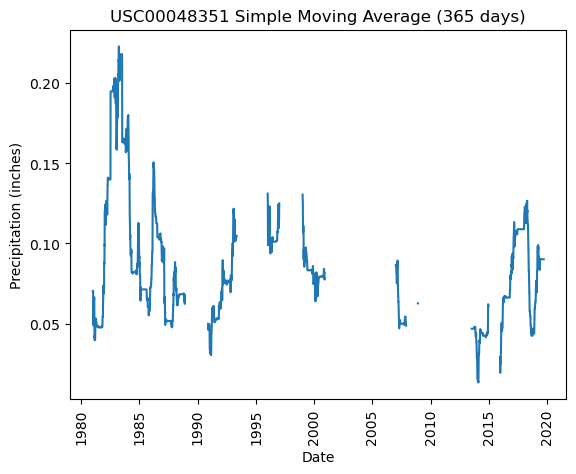

In [126]:
# Generate preciptation plots based on nan thresholds
for i in weather_station_dfs:
    station_name = i.STATION.unique()[0]
    if nan_values[station_name].PRCP < precip_nan_threshold and len(i) >= 0.9 * max_data_points:
        i['Moving_Avg_PRCP_yr'] = i['PRCP'].rolling(window=window_year).mean()
        plt.plot(i['Moving_Avg_PRCP_yr'])
        plt.xlabel('Date')
        plt.ylabel('Precipitation (inches)')
        plt.title(f'{station_name} Simple Moving Average ({window_year} days)')
        plt.xticks(rotation=90)
        plt.show();
        

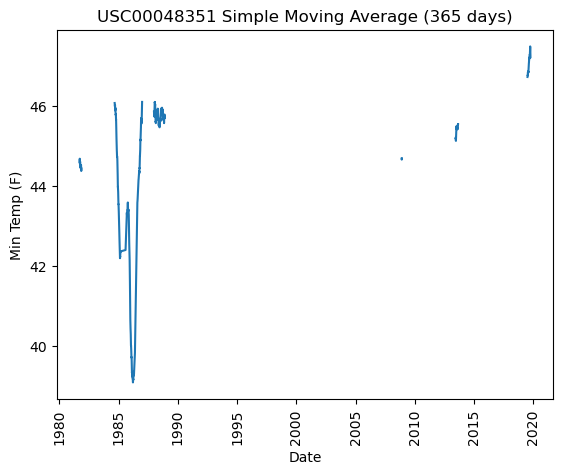

In [127]:
# Generate TMIN plots based on nan thresholds
for i in weather_station_dfs:
    station_name = i.STATION.unique()[0]
    if nan_values[station_name].TMIN < precip_nan_threshold and len(i) >= 0.9 * max_data_points:
        i['Moving_Avg_TMIN_yr'] = i['TMIN'].rolling(window=window_year).mean()
        plt.plot(i['Moving_Avg_TMIN_yr'])
        plt.xlabel('Date')
        plt.ylabel('Min Temp (F)')
        plt.title(f'{station_name} Simple Moving Average ({window_year} days)')
        plt.xticks(rotation=90)
        plt.show();
 

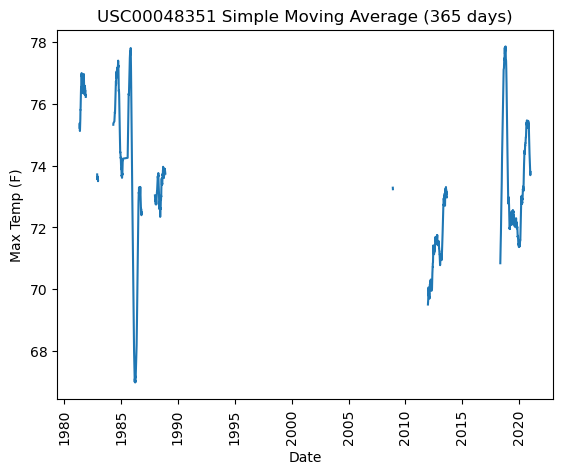

In [129]:
# Generate TMAX plots based on nan thresholds
for i in weather_station_dfs:
    station_name = i.STATION.unique()[0]
    if nan_values[station_name].TMIN < precip_nan_threshold and len(i) >= 0.9 * max_data_points:
        i['Moving_Avg_TMAX_yr'] = i['TMAX'].rolling(window=window_year).mean()
        plt.plot(i['Moving_Avg_TMAX_yr'])
        plt.xlabel('Date')
        plt.ylabel('Max Temp (F)')
        plt.title(f'{station_name} Simple Moving Average ({window_year} days)')
        plt.xticks(rotation=90)
        plt.show();

<Axes: xlabel='Year', ylabel='Yield(Unit/Acre)'>

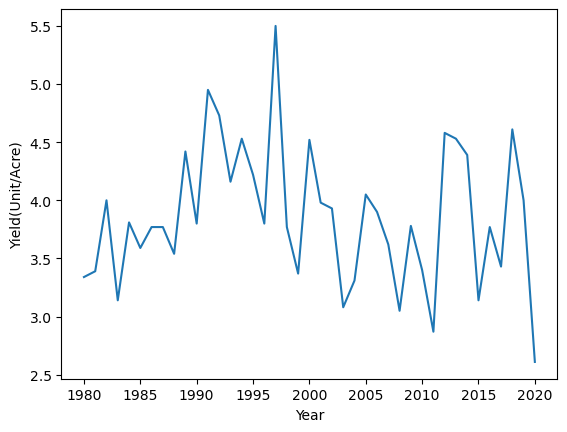

In [9]:
# Plot the Yield per Acre of wine
sns.lineplot(df_wine, x='Year', y='Yield(Unit/Acre)')